In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from pyriemann.clustering import Kmeans

In [2]:
data = pd.read_csv('tb2_data_clean.csv', sep=';')
data.head()

,MMSI,LAT,LON,TIMESTAMP
0,994080063,-5.884088,137.317055,1621911328
1,994071322,-5.555122,135.582663,1621911290
2,994071292,-7.422388,133.898840,1621910145
3,994071012,-9.833815,140.398638,1621909493
4,994071005,-9.831913,140.389897,1621908942


In [3]:
data = data.iloc[:,1:3]
data

,LAT,LON
0,-5.884088,137.317055
1,-5.555122,135.582663
2,-7.422388,133.898840
3,-9.833815,140.398638
4,-9.831913,140.389897
...,...,...
470300,-6.097003,106.886702
470301,-6.097007,106.886708
470302,-6.097015,106.886715
470303,-6.097018,106.886715


In [4]:
data.values

array([[ -5.88408833, 137.317055  ],
       [ -5.55512167, 135.5826633 ],
       [ -7.42238833, 133.89884   ],
       ...,
       [ -6.097015  , 106.886715  ],
       [ -6.09701833, 106.886715  ],
       [ -6.09702667, 106.886705  ]])

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data.values)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
k_means = KMeans(n_clusters=3)
k_means.fit(data.values)
clusters = k_means.fit_predict(data.values)

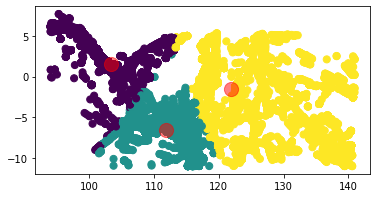

In [6]:
plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [7]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    return distances

distances = []
for i, (cx, cy) in enumerate(centers):
    print(i, cx, cy)
    mean_distance = k_mean_distance(data.values, cx, cy, i, clusters)
    distances.append(mean_distance)

distances

0 1.5369822426938045 103.38074480396514
1 -6.592223957005091 111.81438836139563
2 -1.5097553284758916 121.84500276975632


[[2.6009203811633888,
  2.6009203811633888,
  2.6009203811633888,
  2.6009203811633888,
  2.6009203811633888,
  2.6009203811633888,
  2.600918936712696,
  2.600918936712696,
  2.600918936712696,
  2.600918936712696,
  2.600918936712696,
  2.600918936712696,
  2.600902807148557,
  2.600902807148557,
  2.600902807148557,
  2.600902807148557,
  2.600902807148557,
  2.600902807148557,
  2.6008897140781397,
  2.6009012140258947,
  2.6009012140258947,
  2.6009012140258947,
  2.600910348484233,
  2.6009197364588292,
  2.6009197364588292,
  2.6009197364588292,
  2.6009197364588292,
  2.6009200127929253,
  2.600895656432922,
  2.600895656432922,
  2.600895656432922,
  2.600903560320252,
  2.600903560320252,
  2.600903560320252,
  2.600903560320252,
  2.600903560320252,
  2.600903560320252,
  2.6008864829404863,
  2.6008864829404863,
  2.600891415039567,
  2.600891415039567,
  2.600891415039567,
  2.6008952256844085,
  2.6008952256844085,
  2.6008952256844085,
  2.6008952256844085,
  2.600891932

In [ ]:
### ERROR ###

k_means_riemann = Kmeans(n_clusters=3, n_jobs=-2)
k_means_riemann.fit(data.values)
clusters_riemann = k_means_riemann.fit_predict(data.values)

In [ ]:
### SKIP ###

plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters_riemann, s=50, cmap='viridis')

centers_riemann = k_means_riemann.cluster_centers_
plt.scatter(centers_riemann[:, 1], centers_riemann[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [ ]:
### DBSCAN ###

db = DBSCAN(eps=0.3, min_samples=100).fit(data.values)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data.values, labels))